In [5]:
# 7/22/21: https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2


# end cite

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from utils_child import analysis

<Figure size 432x288 with 0 Axes>

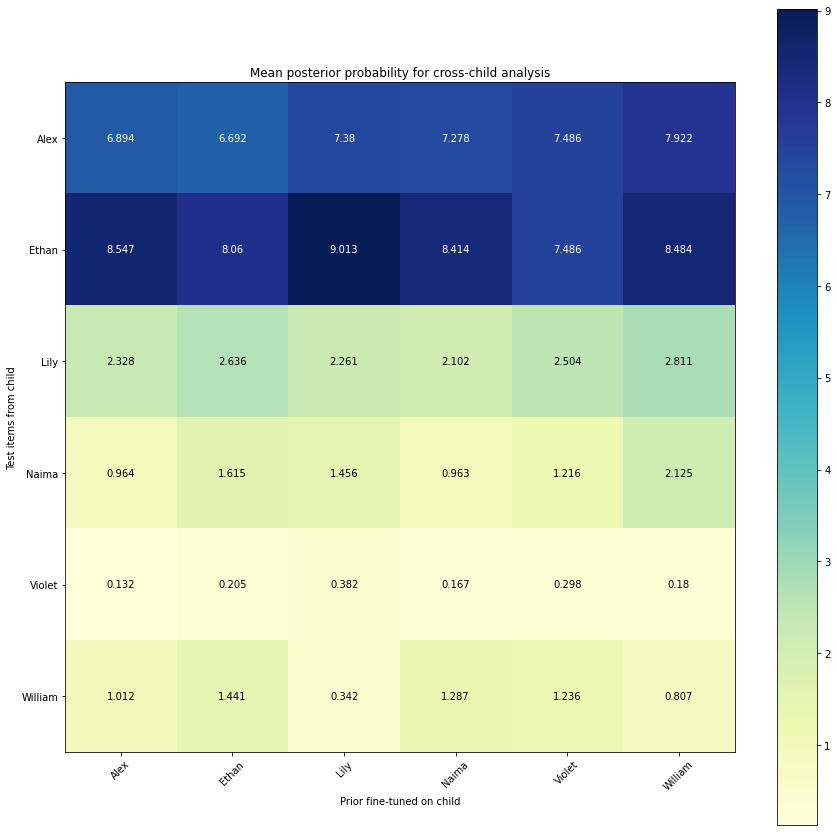

<Figure size 432x288 with 0 Axes>

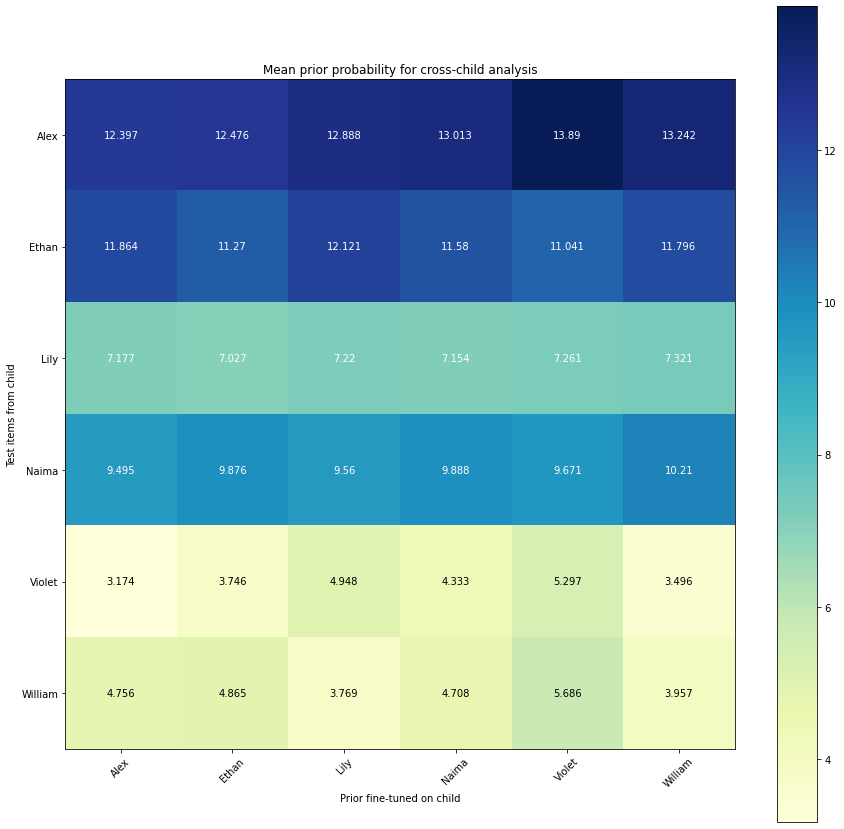

In [8]:

import importlib
importlib.reload(analysis)
    
plt.show(analysis.get_success_scores(is_mean = True, which_key = 'posterior_probability'))
plt.show(analysis.get_success_scores(is_mean = True, which_key = 'prior_probability'))

<Figure size 432x288 with 0 Axes>

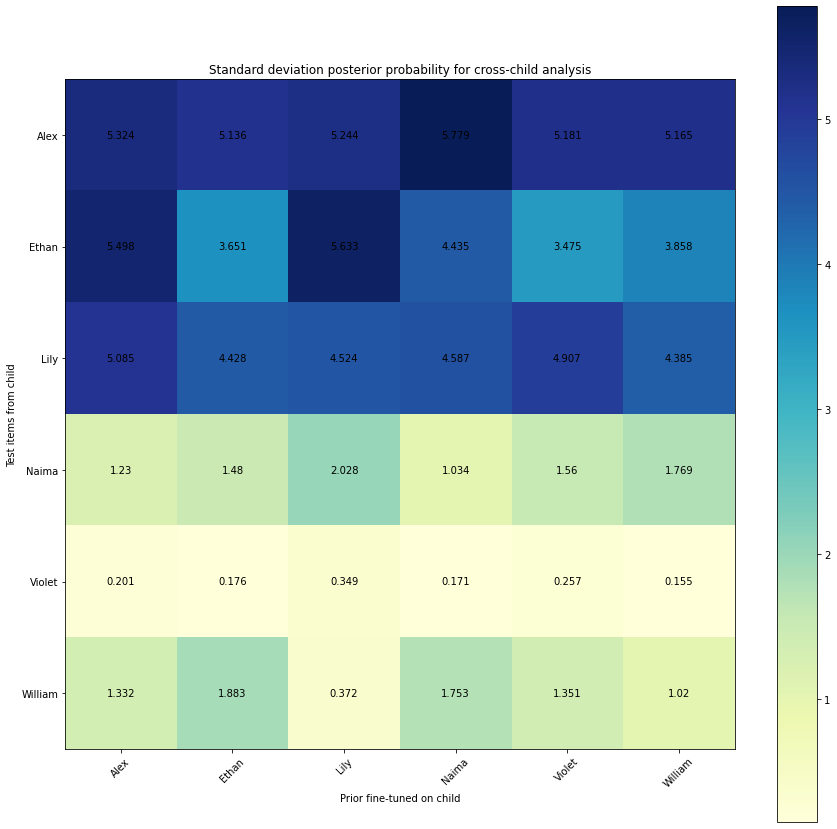

<Figure size 432x288 with 0 Axes>

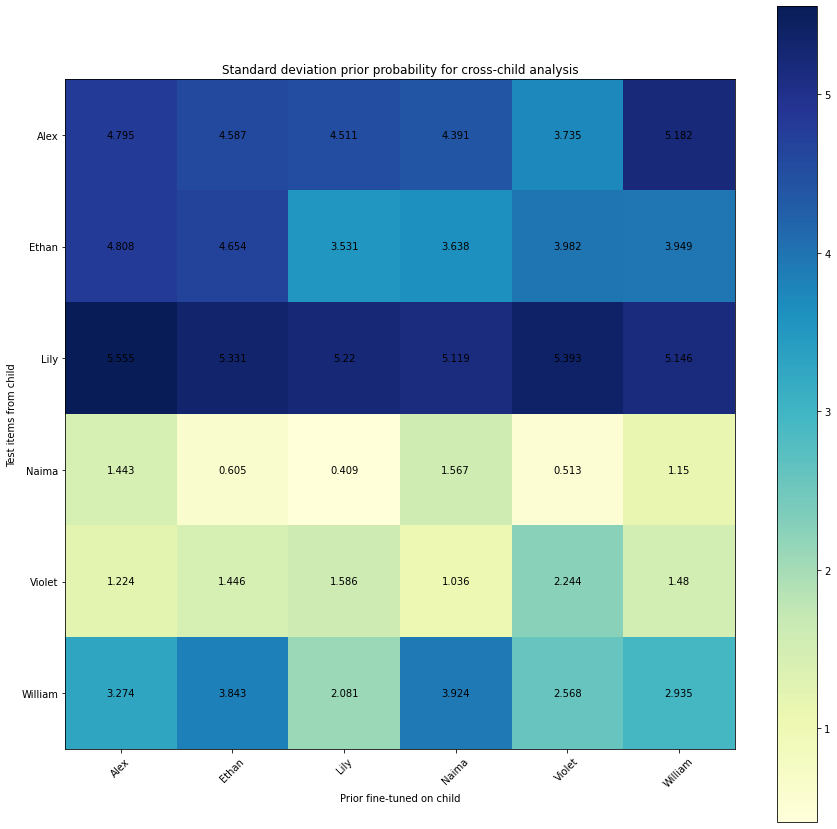

In [9]:

import importlib
importlib.reload(analysis)
 
plt.show(analysis.get_success_scores(is_mean = False, which_key = 'posterior_probability'))
plt.show(analysis.get_success_scores(is_mean = False, which_key = 'prior_probability'))

# Analyzing failures

In [10]:
import importlib
importlib.reload(analysis)

# How to input to this code?
# You need to load the cross scoring, then do what?

cross_scores = analysis.load_all_scores()
cross_scores['token'] = cross_scores['token'].astype(str)
cross_scores_short = cross_scores[['cross_type', 'data_child', 'prior_child', 'posterior_probability','posterior_entropy','prior_probability',
    'kl_flat_to_prior', 'kl_flat_to_posterior','set','token','bert_token_id', 'edit_distance']]

%R -i cross_scores_short

KeyError: "['posterior_probability', 'prior_probability'] not in index"

In [ ]:

%%R
library(plotROC)

cross_scores_short$set_binarized = 0
cross_scores_short$set_binarized[cross_scores_short$set == 'failure'] = 1
table(cross_scores_short$set_binarized)

In [ ]:

%%R
# Get AUC scores into these
unique(as.character(cross_scores_short$cross_type))

In [ ]:

%%R
library('pROC')
auc_by_model = do.call('rbind', lapply(unique(cross_scores_short$cross_type), 
      function(model_name){
    one_model = subset(cross_scores_short, cross_type == model_name)
    roc1 = roc(one_model$set_binarized, one_model$posterior_entropy)
    return(data.frame(cross_type=model_name, auc = auc(roc1)))}))

cross_scores_short = merge(cross_scores_short, auc_by_model)


In [ ]:
%%R
cross_scores_short$model_with_auc = paste0(cross_scores_short$cross_type,' (AUC = ',
round(cross_scores_short$auc, 3),')')

In [ ]:
%%R
cross_scores_short$model_with_auc[1:10]

In [ ]:
%R -o cross_scores_short

auc_df = cross_scores_short[['cross_type', 'auc']]
plt.show(analysis.get_heatmap('AUC for for cross-child analysis', analysis.organize_auc_scores_as_grid(auc_df)))